# Prueba de Nivel de R

## Alumno: Diego Antonini  
## Padrón: 100013

In [ ]:
library("readxl")
library("read")
library("corrplot")
library("car")

In [8]:
tema=read_excel("tema0502.xlsx")

In [11]:
head(tema)

vta,traf,preA,preB,preC,pub,promo,exhib
161,4.308,2.46,2.22,3.59,0.509,0,0
218,5.287,2.83,2.46,4.55,0.479,1,1
289,4.548,2.36,2.13,4.57,0.427,1,1
104,4.568,2.57,2.18,4.25,0.577,0,1
276,5.103,2.17,1.98,4.27,0.307,0,0
295,4.885,2.68,2.50,4.74,0.393,1,1


# A)

In [71]:
model1=lm(formula = log(vta) ~ traf + preA + preB + promo + exhib, data = tema)
summary(model1)


Call:
lm(formula = log(vta) ~ traf + preA + preB + promo + exhib, data = tema)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44751 -0.08662 -0.00931  0.09667  0.32774 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.06397    0.22689  31.134  < 2e-16 ***
traf         0.19013    0.02549   7.460 1.84e-11 ***
preA        -2.73892    0.10190 -26.877  < 2e-16 ***
preB         1.74884    0.08980  19.475  < 2e-16 ***
promo        0.38621    0.03927   9.834  < 2e-16 ***
exhib        0.16941    0.03423   4.950 2.59e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1426 on 114 degrees of freedom
Multiple R-squared:  0.9138,	Adjusted R-squared:   0.91 
F-statistic: 241.7 on 5 and 114 DF,  p-value: < 2.2e-16


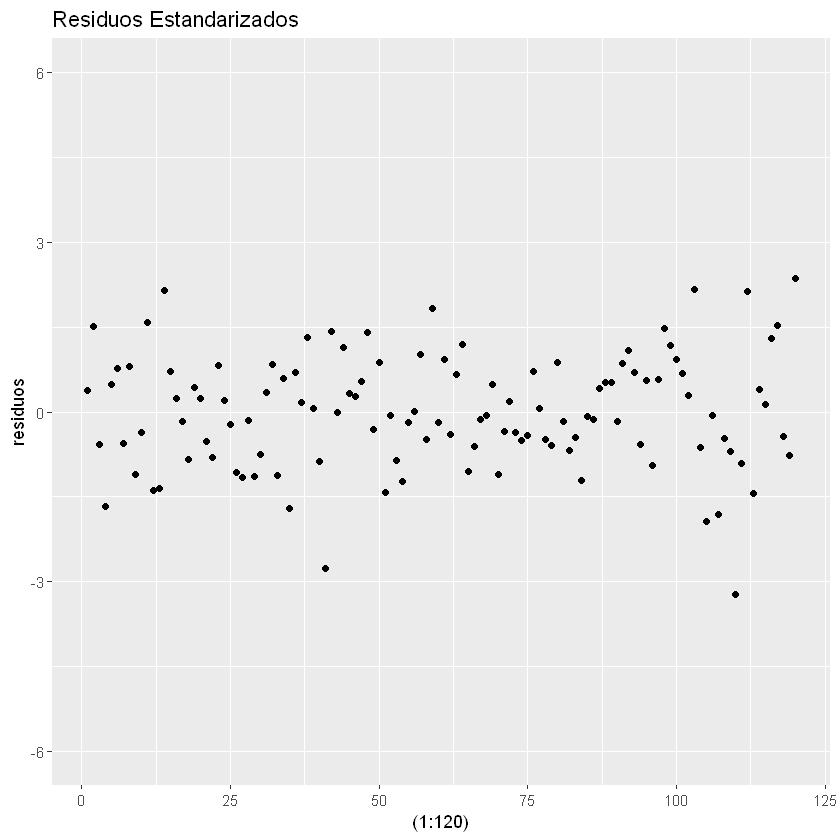

In [75]:
residuos=data.frame(residuos=rstandard(model1))
ggplot(residuos,aes(y=residuos,x=(1:120)))+geom_point()+labs(title="Residuos Estandarizados")+ylim(-6,6)

[1] 0.001599923

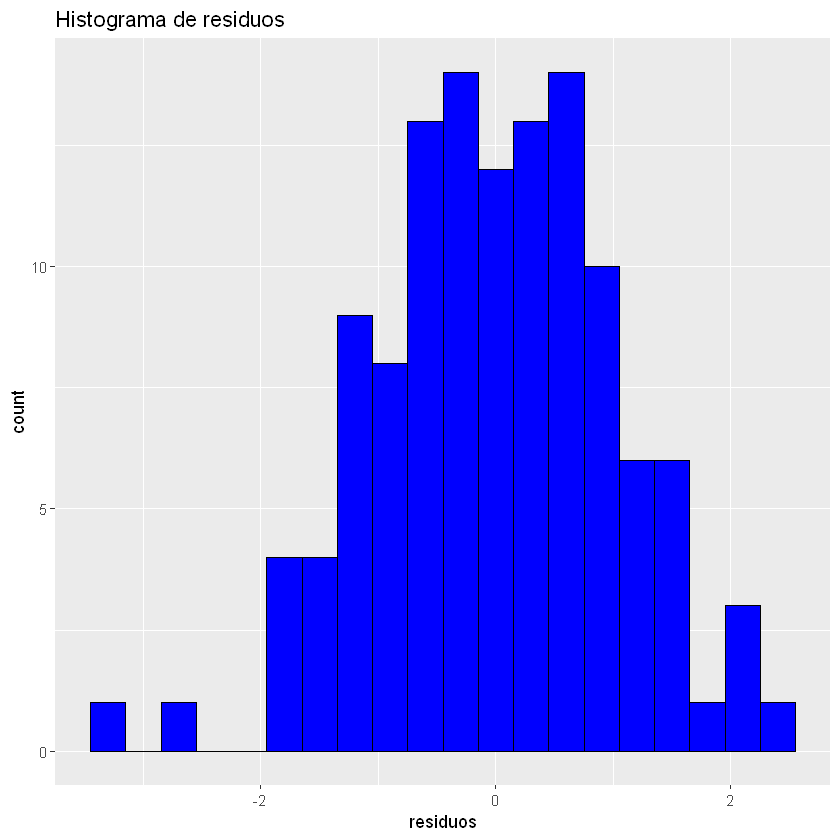

In [94]:
ggplot(residuos, aes(x=residuos)) + 
  geom_histogram(color="black", fill="blue",binwidth=0.3)+
    labs(title="Histograma de residuos")
mean(residuos$residuos)

### R2= 0.9138
### En el "summary" del modelo se puede observar que los coeficientes son significativos 
### Se cumple la homocedasticidad y normalidad de los residuos

# B)

[1] 0.2634861

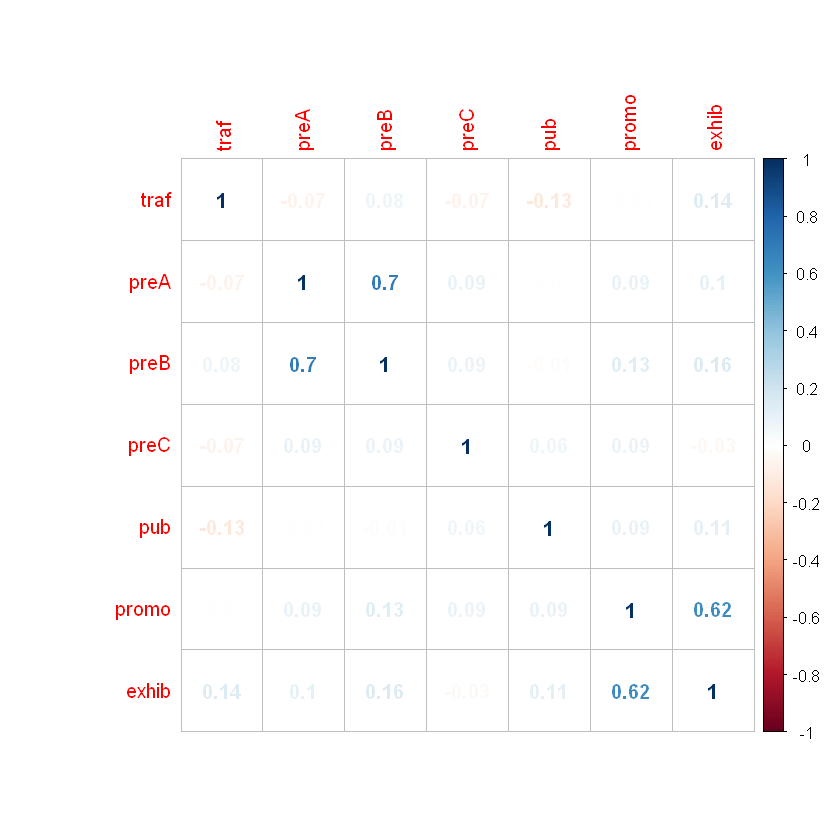

In [26]:
correlation_matrix=cor(tema[,-1])
corrplot(correlation_matrix, method = "number")
det(correlation_matrix)

In [32]:
vif(model1)

traf     preA     preB     preC      pub    promo    exhib 
1.095997 2.018347 2.044944 1.036725 1.040385 1.697385 1.753510

### El DET da 0.26. No es severo pero tampoco es ideal, hay cierto grado de correlación entre el precio de B y A
### Los VIF son menores a 5. No se observa mulitcolinealidad severa

## C)

In [112]:
model3=lm(formula = vta ~ preA, data = tema)
summary(model3)


Call:
lm(formula = vta ~ preA, data = tema)

Residuals:
    Min      1Q  Median      3Q     Max 
-151.95  -67.14  -13.22   40.93  368.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   844.82     108.90   7.758 3.42e-12 ***
preA         -257.84      43.33  -5.950 2.81e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 86.04 on 118 degrees of freedom
Multiple R-squared:  0.2308,	Adjusted R-squared:  0.2243 
F-statistic: 35.41 on 1 and 118 DF,  p-value: 2.809e-08


In [113]:
model3=lm(formula = vta ~ I(preA^2-mean(tema$preA)), data = tema)
summary(model3)


Call:
lm(formula = vta ~ I(preA^2 - mean(tema$preA)), data = tema)

Residuals:
    Min      1Q  Median      3Q     Max 
-149.80  -68.90  -13.20   39.96  372.38 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   390.33      33.85  11.533  < 2e-16 ***
I(preA^2 - mean(tema$preA))   -50.35       8.64  -5.827 4.99e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 86.45 on 118 degrees of freedom
Multiple R-squared:  0.2235,	Adjusted R-squared:  0.2169 
F-statistic: 33.96 on 1 and 118 DF,  p-value: 4.986e-08
